# NLP Assignment - 1

## Group - 29

Description of Data: IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

Link to the dataset - https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download

### Approach

## Library imports

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords

import warnings
warnings.simplefilter("ignore")

## Load the dataset and validate the data load

In [2]:
reviews = pd.read_csv("D:/LargeDatasets/IMDBDataset.csv")

# Check oon the few rows
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Check on the distribution of the sentiment variable

positive    25000
negative    25000
Name: sentiment, dtype: int64


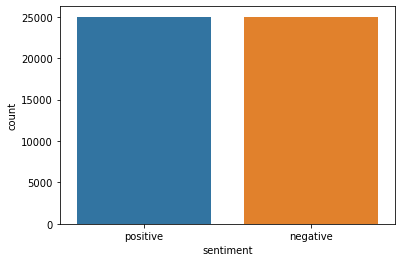

In [3]:
sns.countplot(x='sentiment', data=reviews)
print(reviews['sentiment'].value_counts())

We have a balanced distribution between positive and negative reviews in the dataset

In [4]:
# Check for any missing values
reviews.isna().sum()

review       0
sentiment    0
dtype: int64

There are no missing values in the data

## Text Cleanup

#### Remove Punctuations and some html chacracters using regular expressions

In [5]:
reviews['review'] = reviews['review'].apply(lambda s : re.sub(r'<br />', '', s))
reviews['review'] = reviews['review'].apply(lambda s : re.sub(r'[^\w\s]','', s))

#### Convert every review text words to lower case

In [6]:
reviews['review'] = reviews['review'].str.lower()

In [7]:
reviews['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

#### Removing Stopwords using nltk corpus

In [8]:
stop = stopwords.words('english')

# We will remove the stopwords for every review in the column 
reviews['review'] = reviews['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))